Enter the file path: D:\Learning\ML_electroPi\Matplotlib_Capstone\International_Report_Departures.csv


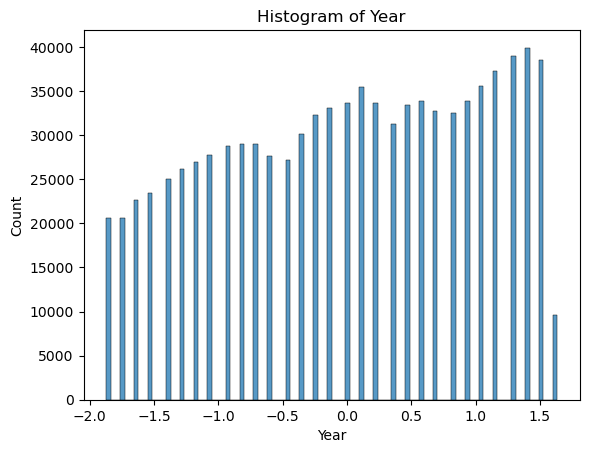

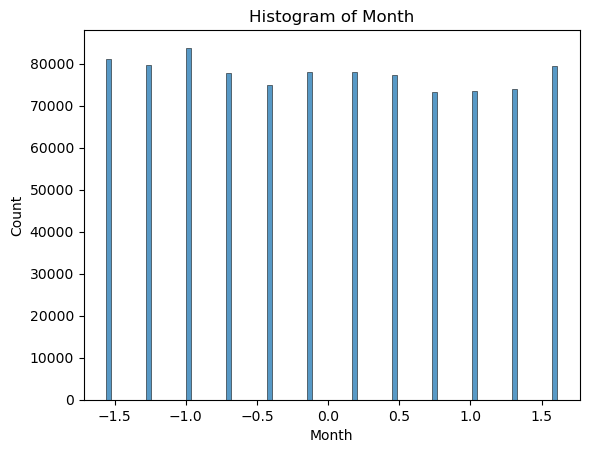

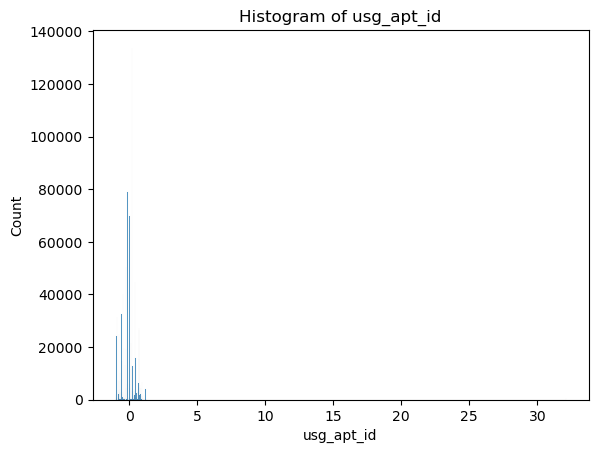

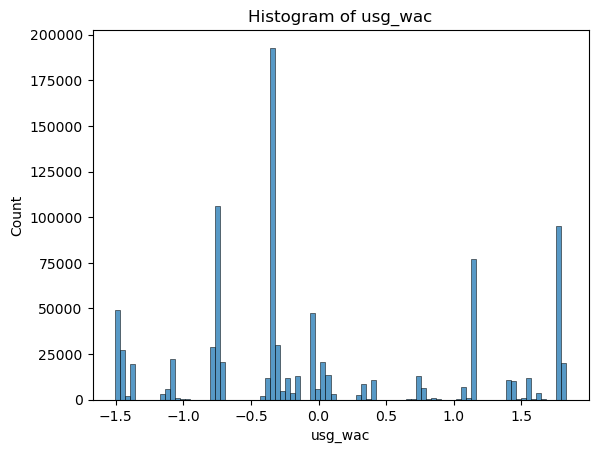

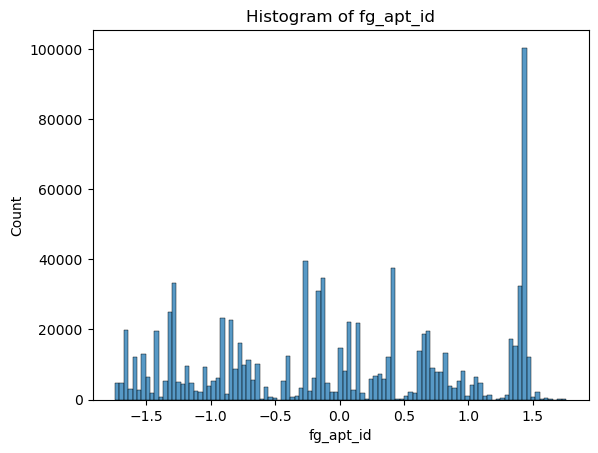

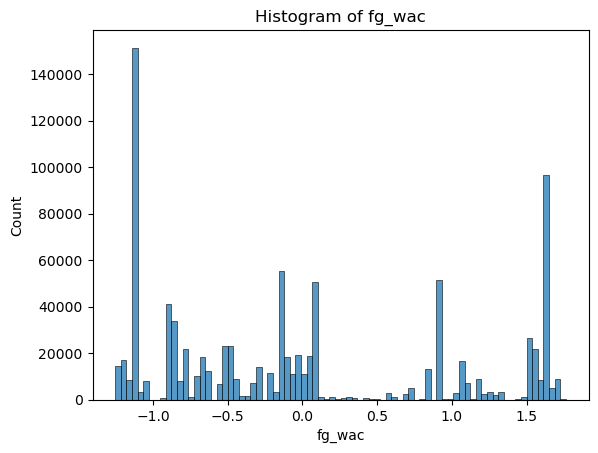

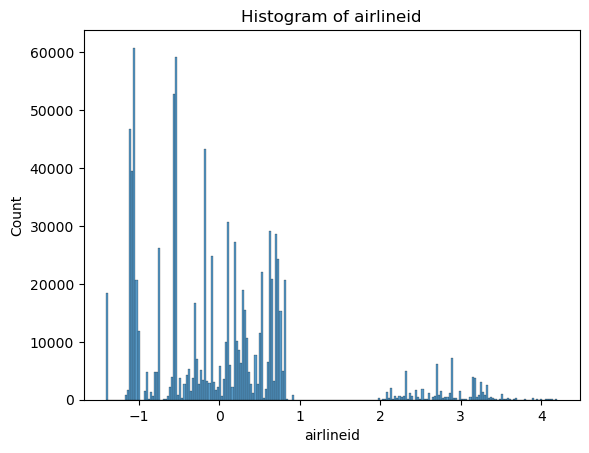

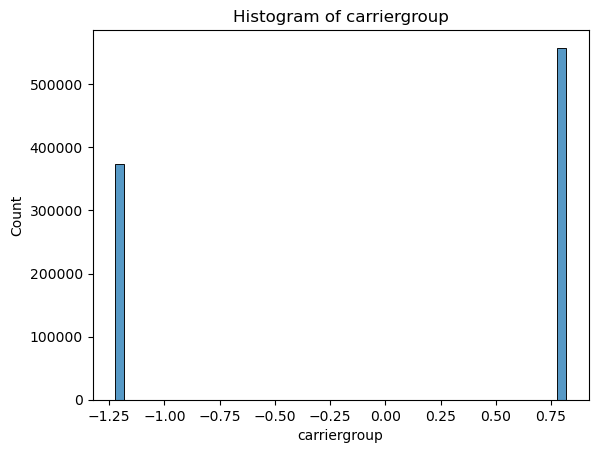

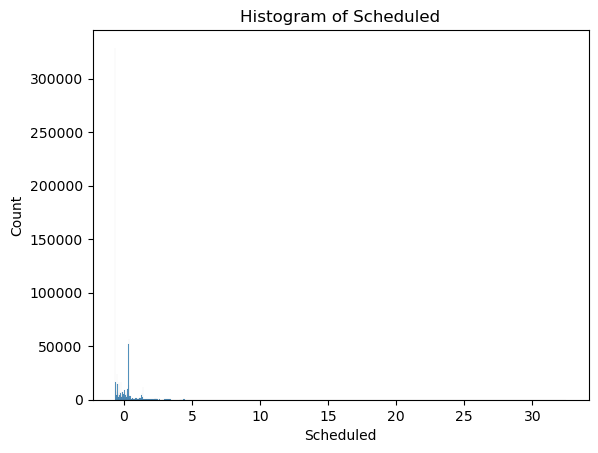

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Step 1: Read data from CSV, Excel, or SQL databases
def read_data(file_path):
    if file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
    elif file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
    elif file_path.endswith('.sql'):
        # Implement code to read data from SQL databases
        pass
    else:
        raise ValueError("Unsupported file format")
    return data

# Step 2: Data preprocessing
def preprocess_data(data):
    # Identify column types
    column_types = data.dtypes

    # Handle missing values
    data = data.fillna(method='ffill')  

    # Encode categorical features
    categorical_columns = column_types[column_types == 'object'].index
    data[categorical_columns] = data[categorical_columns].astype('category')

    # Scale numerical features
    numerical_columns = column_types[column_types != 'object'].index
    data[numerical_columns] = (data[numerical_columns] - data[numerical_columns].mean()) / data[numerical_columns].std()

    return data

# Step 3: Visualization dashboard
def visualize_data(data):
    # Generate histograms for numerical columns
    numerical_columns = data.select_dtypes(include=[np.number]).columns
    for column in numerical_columns:
        plt.figure()
        sns.histplot(data[column])
        plt.title(f"Histogram of {column}")
        plt.show()

    # Generate box plots for categorical columns
    categorical_columns = data.select_dtypes(include=['category']).columns
    for column in categorical_columns:
        plt.figure()
        sns.boxplot(x=column, y='target_variable', data=data)
        plt.title(f"Box plot of {column}")
        plt.show()

    # Generate scatter plots for numerical columns
    for column1 in numerical_columns:
        for column2 in numerical_columns:
            if column1 != column2:
                fig = px.scatter(data, x=column1, y=column2)
                fig.show()

# Step 4: Command-line interface
def main():
    #file_path = input("Enter the file path: ")   #if you want to change the data
    data = read_data('D:\Learning\ML_electroPi\Matplotlib_Capstone\International_Report_Departures.csv')
    preprocessed_data = preprocess_data(data)
    visualize_data(preprocessed_data)

if __name__ == "__main__":
    main()
